In [4]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [5]:
text_data_corpus = pd.read_csv('archive/Train3.csv', encoding='latin-1')
text_data_corpus.head()

,Unnamed: 0,TEXT,Label
0,0,Vacation wasted ! #vacation2017 #photobomb #ti...,JOY
1,1,"Oh Wynwood, youâre so funny! : @user #Wynwoo...",VACATION
2,2,Been friends since 7th grade. Look at us now w...,LOVE
3,3,This is what it looks like when someone loves ...,JOY
4,4,RT @user this white family was invited to a Bl...,JOY


In [6]:
text_data_corpus[text_data_corpus['Label'].isnull()]

,Unnamed: 0,TEXT,Label


In [7]:
text_data_corpus.tail()

,Unnamed: 0,TEXT,Label
69995,69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",JOY
69996,69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",JOY
69997,69997,If one of my daughters is wearing this and ask...,LOVE
69998,69998,Guess who whoop people on THEIR homecoming?! #...,JOY
69999,69999,We Love you Robbie @ Heritage Memorial Cemeter...,LOVE


In [8]:
text_data_corpus = text_data_corpus.drop(['Unnamed: 0'], axis = 1)
text_data_corpus.head()

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,JOY
1,"Oh Wynwood, youâre so funny! : @user #Wynwoo...",VACATION
2,Been friends since 7th grade. Look at us now w...,LOVE
3,This is what it looks like when someone loves ...,JOY
4,RT @user this white family was invited to a Bl...,JOY


In [9]:
mapping = pd.read_csv("archive/Mapping2.csv")
mapping = mapping.drop(['Unnamed: 0'], axis = 1)
emoticons = mapping['emoticons'].tolist()

In [10]:
mapp = {}
for emo in range(0,len(emoticons)):
    mapp[emo]= emoticons[emo]

In [11]:
mapp

{0: '😜', 1: '📸', 2: '💙', 3: '❤'}

<AxesSubplot:xlabel='Label', ylabel='count'>

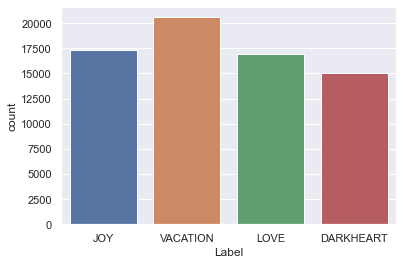

In [12]:
sns.countplot(x=text_data_corpus['Label'], data=text_data_corpus)


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tcobalkaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
text_data_corpus['TEXT'] = [word_tokenize(entry) for entry in text_data_corpus['TEXT']]

In [15]:
text_data_corpus['TEXT']

0        [Vacation, wasted, !, #, vacation2017, #, phot...
1        [Oh, Wynwood, ,, youâre, so, funny, !, :, @,...
2        [Been, friends, since, 7th, grade, ., Look, at...
3        [This, is, what, it, looks, like, when, someon...
4        [RT, @, user, this, white, family, was, invite...
                               ...                        
69995    [Yes, ,, I, call, Galina, ``, my, Bubie, '', G...
69996    [I, SEA, you, ,, Seattle, @, Ballard, Seafood,...
69997    [If, one, of, my, daughters, is, wearing, this...
69998    [Guess, who, whoop, people, on, THEIR, homecom...
69999    [We, Love, you, Robbie, @, Heritage, Memorial,...
Name: TEXT, Length: 70000, dtype: object

In [12]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tcobalkaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [14]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tcobalkaya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tcobalkaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#train data corpus
for index,entry in enumerate(text_data_corpus['TEXT']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    text_data_corpus.loc[index,'TEXT_FINAL'] = str(Final_words)

In [16]:
text_data_corpus.head()

,TEXT,Label,TEXT_FINAL
0,"[Vacation, wasted, !, #, vacation2017, #, phot...",JOY,"['Vacation', 'waste', 'photobomb', 'tired', 'v..."
1,"[Oh, Wynwood, ,, youâre, so, funny, !, :, @,...",VACATION,"['Oh', 'Wynwood', 'funny', 'user', 'Wynwood', ..."
2,"[Been, friends, since, 7th, grade, ., Look, at...",LOVE,"['Been', 'friends', 'since', 'grade', 'Look', ..."
3,"[This, is, what, it, looks, like, when, someon...",JOY,"['This', 'look', 'like', 'someone', 'love', 'u..."
4,"[RT, @, user, this, white, family, was, invite...",JOY,"['RT', 'user', 'white', 'family', 'invite', 'B..."


In [17]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(text_data_corpus['TEXT_FINAL'],
                                                                    text_data_corpus['Label'],
                                                                    test_size=0.2, random_state=42)

In [18]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [19]:
Train_Y

array([3, 0, 2, ..., 1, 0, 0])

In [20]:
Test_Y

array([0, 1, 2, ..., 3, 3, 1])

In [21]:
Tfidf_vect = TfidfVectorizer(max_features = 5000)
Tfidf_vect.fit(text_data_corpus['TEXT_FINAL'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [22]:
pd.DataFrame(Train_X_Tfidf.toarray(), columns = Tfidf_vect.get_feature_names())

,aaron,ab,abby,abc,able,about,aboutlastnight,abs,absolute,absolutely,...,yup,zach,zen,zero,zeta,zion,zombie,zone,zoo,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
print(Tfidf_vect.vocabulary_)

{'vacation': 4683, 'waste': 4789, 'photobomb': 3388, 'tired': 4513, 'miami': 2876, 'port': 3483, 'oh': 3199, 'wynwood': 4946, 'funny': 1799, 'user': 4678, 'art': 205, 'flowers': 1705, 'vibes': 4715, 'been': 394, 'friends': 1775, 'since': 4046, 'grade': 1921, 'look': 2652, 'follow': 1713, 'dream': 1345, 'love': 2675, 'this': 4473, 'like': 2593, 'someone': 4138, 'puppy': 3588, 'brother': 618, 'rt': 3819, 'white': 4851, 'family': 1573, 'invite': 2302, 'black': 468, 'never': 3080, 'laugh': 2520, 'hard': 2029, 'life': 2583, 'track': 4558, 'season': 3915, 'ready': 3654, 'for': 1724, 'ya': 4953, 'university': 4658, 'word': 4918, 'merry': 2858, 'christmas': 884, 'filthy': 1648, 'little': 2618, 'animal': 145, 'wearing': 4806, 'ugly': 4639, 'sweater': 4354, 'feature': 1607, 'weston': 4834, 'toronto': 4540, 'head': 2058, 'home': 2136, 'akron': 78, 'city': 906, 'hospital': 2168, 'story': 4266, 'on': 3215, 'saturday': 3877, 'collins': 976, 'ave': 263, 'beach': 367, 'fl': 1678, 'ladies': 2486, 'cont

In [24]:
print(Train_X_Tfidf)

  (0, 4722)	0.35565187272634474
  (0, 4289)	0.3616942551278862
  (0, 3305)	0.19453496239982662
  (0, 2845)	0.29523399936644096
  (0, 2737)	0.19848999561637676
  (0, 2618)	0.20647687223098654
  (0, 2593)	0.1964532448048763
  (0, 2487)	0.25805782457877297
  (0, 2379)	0.353460874205905
  (0, 1405)	0.3155394216994392
  (0, 463)	0.30633823150393125
  (0, 455)	0.3348440257603124
  (1, 4817)	0.3600223024971231
  (1, 4788)	0.5679331132474866
  (1, 1987)	0.4218574036019009
  (1, 1859)	0.33824314091868896
  (1, 382)	0.33473488420284003
  (1, 114)	0.3787035602250416
  (2, 3817)	0.4463323304330442
  (2, 3222)	0.36728783628374284
  (2, 3199)	0.33854647978859637
  (2, 3010)	0.3625230968472092
  (2, 1258)	0.42561563761053395
  (2, 66)	0.4885710904511763
  (3, 4678)	0.15848348291279798
  :	:
  (55996, 4811)	0.38881804141076964
  (55996, 4678)	0.13874583180874003
  (55996, 3999)	0.3892905625235034
  (55996, 2722)	0.3932330554729525
  (55996, 1845)	0.3627137280213782
  (55996, 1773)	0.2557326906050705
 

In [30]:
# fit the training dataset on the NB classifier

Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf, Train_Y)

# Predict the labels on validation dataset
# predictions_NB = Naive.predict(Test_X_Tfidf)

# Accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

#todo: 0.3 test size : Naive Bayes Accuracy Score ->  30.29047619047619
#todo: 8 label : Naive Bayes Accuracy Score ->  33.5809523809523

# 4 sınıf ile Naive Bayes Accuracy Score ->  44.95

MultinomialNB()

In [26]:
# new
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Train_X)
X_train_counts.shape


(56000, 52995)

In [27]:
# new
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(56000, 52995)

In [28]:
print(X_train_tfidf)

  (0, 49869)	0.35277798132429095
  (0, 44504)	0.3777146042071277
  (0, 34960)	0.19386063663538988
  (0, 29601)	0.29836393081354207
  (0, 28428)	0.19795667659732027
  (0, 26930)	0.20640756086609577
  (0, 26690)	0.19604181328769063
  (0, 25613)	0.25680366908182095
  (0, 23995)	0.3465712924107814
  (0, 13483)	0.3134272317231062
  (0, 4639)	0.3050036640088636
  (0, 4562)	0.3297414481731791
  (1, 50785)	0.2970022592478806
  (1, 50455)	0.45855158644870425
  (1, 26781)	0.5759368119852247
  (1, 19390)	0.34623516432893814
  (1, 17950)	0.27854353684485356
  (1, 3689)	0.27637211524343835
  (1, 1124)	0.3097903357873969
  (2, 39635)	0.37851455158748404
  (2, 39447)	0.5304128028021133
  (2, 34109)	0.31056895508506965
  (2, 33746)	0.2883336776352098
  (2, 31437)	0.30691233218485314
  (2, 12039)	0.36400439626986375
  :	:
  (55996, 17785)	0.362308477638463
  (55996, 16860)	0.25625138454885854
  (55996, 13024)	0.35732014418043306
  (55997, 38137)	0.32516965750911486
  (55997, 29388)	0.3668915873952795
 

In [31]:
# new
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', Naive),])
text_clf=text_clf.fit(Train_X, Train_Y)

In [32]:
# new
predicted = text_clf.predict(Train_X)
np.mean(predicted == Train_Y)

0.6766785714285715

In [33]:
# new
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Train_Y, predicted)
print(cm)

[[ 5231   801  2095  3915]
 [  199  9474   875  3307]
 [  431   848  8757  3602]
 [  238   959   836 14432]]


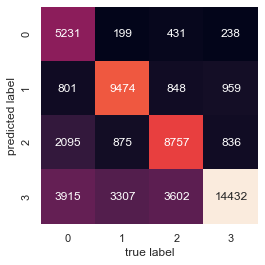

In [34]:
import matplotlib.pyplot as plt
mat = confusion_matrix(Train_Y, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Train_Y, predicted,
                            #target_names = mapping.emoticons
                           ))

              precision    recall  f1-score   support

           0       0.86      0.43      0.58     12042
           1       0.78      0.68      0.73     13855
           2       0.70      0.64      0.67     13638
           3       0.57      0.88      0.69     16465

    accuracy                           0.68     56000
   macro avg       0.73      0.66      0.67     56000
weighted avg       0.72      0.68      0.67     56000



In [37]:
#print(Train_Y)

[3 0 2 ... 1 0 0]


In [36]:
#print(predicted)

[3 3 3 ... 1 2 0]


In [56]:
#SVM

In [57]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge',
                                                   penalty='l2',
                                                   alpha=1e-3, 
                                                   random_state=42)),
                         ])
text_clf_svm.fit(Train_X, Train_Y)

    
predicted_svm = text_clf_svm.predict(Train_X)


np.mean(predicted_svm == Train_Y)


0.7148035714285714

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Train_Y, predicted_svm)
print(cm)

[[ 7502  1211  1424  1905]
 [  384 11119   666  1686]
 [ 1108  1592  8806  2132]
 [  657  2289   917 12602]]


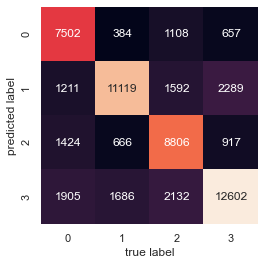

In [67]:
mat = confusion_matrix(Train_Y, predicted_svm)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [70]:
from sklearn.metrics import classification_report
print(classification_report(Train_Y, predicted_svm,
                            ))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69     12042
           1       0.69      0.80      0.74     13855
           2       0.75      0.65      0.69     13638
           3       0.69      0.77      0.72     16465

    accuracy                           0.71     56000
   macro avg       0.72      0.71      0.71     56000
weighted avg       0.72      0.71      0.71     56000



In [58]:
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Test_Y, predictions_NB)
#print(cm)

In [59]:
#from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(Test_Y, predictions_NB)
#print(accuracy)

In [60]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix
#mat = confusion_matrix(Test_Y, predictions_NB)
#sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

#plt.xlabel('true label')
#plt.ylabel('predicted label');

In [65]:
#Train_X_Tfidf.toarray()

In [64]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier

#SVM = svm.SVC(C=1.0, kernel='poly', degree=8, gamma='auto')

# SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto')
# SVM.fit(Train_X_Tfidf, Train_Y)
# predict the labels on validation dataset
# predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, Test_Y)*100)

In [68]:
#from sklearn.svm import SVC
#print(SVC().get_params())

/Users/tcobalkaya/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tcobalkaya/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tcobalkaya/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tcobalkaya/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 10084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tcobalkaya/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128540 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/tcobalkaya/opt/anaconda3/lib/py

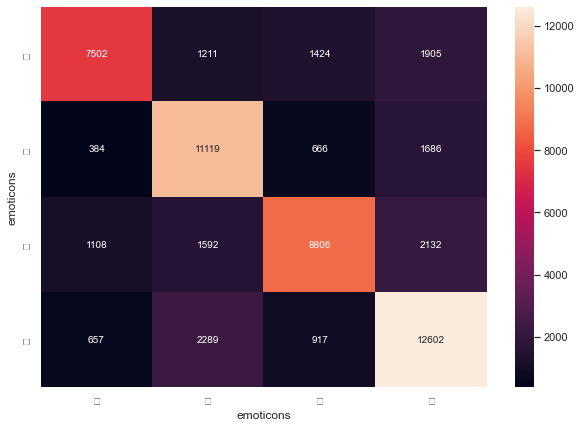

In [72]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l = mapping.emoticons

df_cm = pd.DataFrame(mat, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()